<a href="https://colab.research.google.com/github/allexanderprastya/PROJECT-TA-JURNAL/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Library

In [1]:
!pip install -qq swifter
!pip install -qq Sastrawi

In [2]:
import pandas as pd
import swifter
import regex as re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###Dataset

In [3]:
df = pd.read_csv('/content/review_15k.csv')

In [4]:
df.head()

,index,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,filename
0,13349,5e8751e9-4a6c-4e64-994d-31b7a2ea5971,AGG GARAGE,https://play-lh.googleusercontent.com/a-/AFdZu...,Bangke gw turun nyangkut kenok langsung tolong...,5,0,NaN,2022-09-03 15:50:09,"Halo AGG GARAGE, kami menyesal mendengar Anda ...",2022-09-04 07:18:25,/content/data/review_score_5.csv
1,235,653656ce-7086-4fd3-a481-619a658b2a7c,Herul Idoy,https://play-lh.googleusercontent.com/a/AItbvm...,Manga pa pubg selalu loding ketika login padah...,1,0,2.1.0,2022-09-10 00:24:20,"Halo Herul , kami menyesal mendengar Anda meng...",2022-09-10 08:56:28,/content/data/review_score_1.csv
2,12172,5c6746b5-19b6-46d1-8c0a-3bbfd6cc11b9,Rayyan Habibi,https://play-lh.googleusercontent.com/a-/AFdZu...,Bag nya dong developer perbaiki semua ngeluh k...,4,0,NaN,2022-06-14 03:26:20,"Halo Rayyan, kami mohon maaf atas ketidaknyama...",2022-06-15 18:58:12,/content/data/review_score_4.csv
3,5192,aff528b9-22d8-4eca-a840-f606fe23db16,As Miyati,https://play-lh.googleusercontent.com/a-/AFdZu...,Emang berat putaran kenapa gak seperti biasany...,3,0,NaN,2022-08-30 22:01:07,"Halo Miyati, kami mohon maaf atas ketidaknyama...",2022-08-31 08:01:41,/content/data/review_score_3.csv
4,905,b2c5337a-5c2e-4892-aad2-d66d3aa462ab,Danial,https://play-lh.googleusercontent.com/a-/AFdZu...,P :v,1,0,NaN,2022-08-29 15:17:29,"Halo Danial, kami memerlukan lebih banyak info...",2022-08-31 03:44:15,/content/data/review_score_1.csv


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 15000 non-null  int64 
 1   reviewId              15000 non-null  object
 2   userName              15000 non-null  object
 3   userImage             15000 non-null  object
 4   content               15000 non-null  object
 5   score                 15000 non-null  int64 
 6   thumbsUpCount         15000 non-null  int64 
 7   reviewCreatedVersion  8110 non-null   object
 8   at                    15000 non-null  object
 9   replyContent          14859 non-null  object
 10  repliedAt             14859 non-null  object
 11  filename              15000 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.4+ MB


###Removing a variable(s)

In [6]:
df.columns

Index(['index', 'reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'filename'],
      dtype='object')

In [7]:
df.drop('index',axis=1,inplace=True)
df.drop('reviewId',axis=1,inplace=True)
df.drop('userName',axis=1,inplace=True)
df.drop('userImage',axis=1,inplace=True)
df.drop('thumbsUpCount',axis=1,inplace=True)
df.drop('reviewCreatedVersion',axis=1,inplace=True)
df.drop('at',axis=1,inplace=True)
df.drop('replyContent',axis=1,inplace=True)
df.drop('repliedAt',axis=1,inplace=True)
df.drop('filename',axis=1,inplace=True)

In [8]:
df

,content,score
0,Bangke gw turun nyangkut kenok langsung tolong...,5
1,Manga pa pubg selalu loding ketika login padah...,1
2,Bag nya dong developer perbaiki semua ngeluh k...,4
3,Emang berat putaran kenapa gak seperti biasany...,3
4,P :v,1
...,...,...
14995,Game ini sangat burik dan sangat hd dengan keb...,5
14996,Lemot,3
14997,Bagus banget,5
14998,"Game seru,keren,hd ;tapi banyak bug, pemakaian...",3


In [9]:
df.score.value_counts()

3    5052
1    2536
4    2481
2    2475
5    2456
Name: score, dtype: int64

In [10]:
df.content.value_counts().head()

Bagus      139
Mantap     127
Ok          92
Good        76
Lumayan     37
Name: content, dtype: int64

In [11]:
df.content.describe()

count     15000
unique     8674
top       Bagus
freq        139
Name: content, dtype: object

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid',font_scale= 1.2)
sns.set_palette(sns.color_palette("bright"))

In [13]:
# helper function to draw percentage above each bar
def draw_percentage(ax,total=float(len(df))):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='bottom')

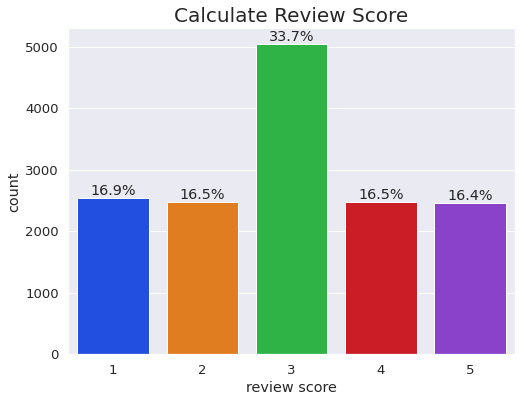

In [14]:
plt.figure(figsize = (8,6))
total = float(len(df))
ax = sns.countplot(x = 'score',data=df)
plt.title('Calculate Review Score', fontsize=20)
plt.xlabel('review score')
draw_percentage(ax)

plt.show()

###Data Cleansing

In [15]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['content'] = df['content'].swifter.apply(word_tokenize_wrapper)

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [16]:
def cleansing(text):
    # Mengubah tipe data menjadi string
    text = str(text)
    #hapus non ASCII (hapus emoticon, chinese word, dll)
    text = text.encode("ascii", "replace").decode("ascii")    
    #menghapus number
    text = re.sub(r"\d+", " ", text) 
    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r"http\S+", " ", text)
    text = re.sub("(@\w+|#\w+)", " ", text)
    # Menghapus Tag HTML
    text = re.sub("<.*?>", " ", text)
    # Menghapus Tanda Baca Seperti Titik Dan Koma
    text = text.translate(str.maketrans(" ", " ", string.punctuation))
    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub("[^a-zA-Z]", " ", text)
    # Mengganti baris baru (enter) dengan spasi
    text = text.replace("\t"," ").replace("\n"," ").replace("\\"," ")
    # Menghapus Karakter Berulang (Contoh: Horeeee!!!! menjadi Hore!)
    text = re.sub(r"(\w)(\1{2,})", r"\1 ", text)
    text = re.sub(r"\b[a-zA-Z]\b"," ",text)
    text = text.strip()
    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub("\s+", " ",text)
    # Mengubah setiap kata menjadi lowercase
    return text.lower()

In [17]:
df["content"] = df["content"].swifter.apply(cleansing)

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [18]:
df

,content,score
0,bangke gw turun nyangkut kenok langsung tolong...,5
1,manga pa pubg selalu loding ketika login padah...,1
2,bag nya dong developer perbaiki semua ngeluh k...,4
3,emang berat putaran kenapa gak seperti biasany...,3
4,,1
...,...,...
14995,game ini sangat burik dan sangat hd dengan keb...,5
14996,lemot,3
14997,bagus banget,5
14998,game seru keren hd tapi banyak bug pemakaian m...,3


###Normalisasi

In [19]:
normalized_word = pd.read_csv("/content/kamus_gaul_2.csv", sep=";", encoding='utf-8', header=None)

In [20]:
normalized_word

,0,1
0,aaau,NaN
1,aadfdd,NaN
2,aaj,NaN
3,aal,NaN
4,aapa,apa
...,...,...
7013,zona,zona
7014,zone,zona
7015,zonk,kosong
7016,zz,NaN


In [21]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['content'] = df['content'].swifter.apply(word_tokenize_wrapper)

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [22]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [23]:
df['content'] = df['content'].swifter.apply(normalized_term) 

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [24]:
def toSentence(text):
    text = ' '.join(str(word) for word in text)
    return text 

In [25]:
df['content'] = df['content'].swifter.apply(toSentence) 

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [26]:
df

,content,score
0,bangkai aku turun menyangkut knock langsung to...,5
1,mengapa apa pubg selalu loading ketika login p...,1
2,bug nan dong developer perbaiki semua mengeluh...,4
3,memang berat putar kenapa tidak seperti biasan...,3
4,,1
...,...,...
14995,game ini sangat grafis buruk dan sangat high d...,5
14996,lambat,3
14997,bagus banget,5
14998,game seru keren high definition tapi banyak bu...,3


###Stopwords Removal

In [27]:
stopwords_id = set(stopwords.words('indonesian'))
stopwords_en = set(stopwords.words('english'))
stopwords_list = {"nan"}

In [28]:
def stopwords_removal(text):
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords_id]
    return text

df['content'] = df['content'].swifter.apply(stopwords_removal)

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [29]:
def stopwords_removal_2(text):
    text = [word for word in text if word not in stopwords_en]
    return text

df['content'] = df['content'].swifter.apply(stopwords_removal_2)

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [30]:
def stopwords_removal_3(text):
    text = [word for word in text if word not in stopwords_list]
    return text

df['content'] = df['content'].swifter.apply(stopwords_removal_3)

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

In [31]:
def toSentence(text):
    text = ' '.join(str(word) for word in text)
    return text 

In [32]:
df['content'] = df['content'].swifter.apply(toSentence)
df

Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

,content,score
0,bangkai turun knock langsung tolong tencent sa...,5
1,pubg loading login kuota beli,1
2,bug developer perbaiki mengeluh bug lag,4
3,berat putar enak mainnya bagus,3
4,,1
...,...,...
14995,game grafis buruk high definition keburikannya...,5
14996,lambat,3
14997,bagus banget,5
14998,game seru keren high definition bug pemakaian ...,3


###Stemming

In [ ]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['content'] = df['content'].swifter.apply(word_tokenize_wrapper)

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
def stemmed_wrapper(term):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(term)

term_dict = {}

for document in df['content']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['content'] = df['content'].swifter.apply(get_stemmed_term)

In [ ]:
def toSentence(text):
    text = ' '.join(str(word) for word in text)
    return text 

In [ ]:
df['content'] = df['content'].swifter.apply(toSentence)

In [ ]:
df

###Save Csv 

In [53]:
df.to_csv('LabelingScore.csv',  encoding='utf-8', index=False, header=True)

In [34]:
df = pd.read_csv('/content/review_15k_stopwords.csv')

In [35]:
df

,content,score
0,bangkai turun knock langsung tolong tencent sa...,5
1,pubg loading login kuota beli,1
2,bug developer perbaiki mengeluh bug lag,4
3,berat putar enak mainnya bagus,3
4,NaN,1
...,...,...
14995,game grafis buruk high definition keburikannya...,5
14996,lambat,3
14997,bagus banget,5
14998,game seru keren high definition bug pemakaian ...,3


In [36]:
df.isna().sum() 

content    651
score        0
dtype: int64

In [37]:
df2 = df.dropna()
df2.isna().sum()

content    0
score      0
dtype: int64

In [ ]:
df.drop('score',axis=1,inplace=True)

In [39]:
df2.reset_index(drop=True)

,content,score
0,bangkai turun knock langsung tolong tencent sa...,5
1,pubg loading login kuota beli,1
2,bug developer perbaiki mengeluh bug lag,4
3,berat putar enak mainnya bagus,3
4,game bagus sayang sinyal turun gameplay sulit ...,4
...,...,...
14344,game grafis buruk high definition keburikannya...,5
14345,lambat,3
14346,bagus banget,5
14347,game seru keren high definition bug pemakaian ...,3


In [40]:
df2.to_csv('review_15k_clean_2.csv',  encoding='utf-8', index=False, header=True)

###Labeling berdasarkan score

In [49]:
df = pd.read_csv('/content/review_15k_clean_2.csv')

In [50]:
df

,content,score
0,bangkai turun knock langsung tolong tencent sa...,5
1,pubg loading login kuota beli,1
2,bug developer perbaiki mengeluh bug lag,4
3,berat putar enak mainnya bagus,3
4,game bagus sayang sinyal turun gameplay sulit ...,4
...,...,...
14344,game grafis buruk high definition keburikannya...,5
14345,lambat,3
14346,bagus banget,5
14347,game seru keren high definition bug pemakaian ...,3


In [51]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <=2 :
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

df['sentiment'] = df.score.swifter.apply(to_sentiment)

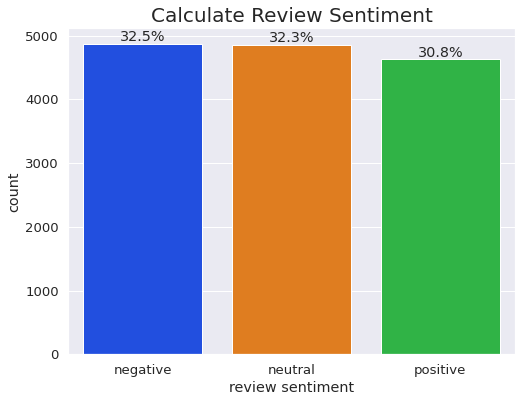

In [52]:
class_names = ['negative', 'neutral', 'positive']

plt.figure(figsize = (8,6))
total = float(len(df))
ax = sns.countplot(x = 'sentiment',
                   data = df
                   )
ax.set_xticklabels(class_names)
plt.title('Calculate Review Sentiment',
          fontsize=20
          )
plt.xlabel('review sentiment')
draw_percentage(ax)

plt.show()

###Labeling menggunakan textBlob

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def getPolarity(review):
  analysis = TextBlob(review)
  try:
    return analysis.translate(from_lang="id",
                              to="en").sentiment.polarity
  except:
    return analysis.sentiment.polarity

def analyze(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

In [ ]:
df["polarity"] = df["content"].swifter.apply(getPolarity)
df["label"] = df["polarity"].swifter.apply(analyze)

In [ ]:
df

In [ ]:
df['label'].value_counts()

In [ ]:
df.to_csv('labelTextBlob_no_stemming.csv', encoding='utf-8', index=False)

In [ ]:
from google.colab import files
files.download('/content/labelTextBlob_no_stemming.csv') 